# Sentiment Analysis and Word clouds for Quran and Bible.

# Turkish Quran

### Meeting the data

In [150]:
#pip install nltk

In [151]:
import pandas as pd
import numpy as np
from csv import QUOTE_NONE
from nltk.corpus import stopwords

In [152]:
df = pd.read_csv("Turkish.csv",dtype=object,sep='|')
df.head()

,Sure,Ayet,Metin
0,1,1,Rahman ve Rahîm Allah´ın adıyla...
1,1,2,"Hamt, âlemlerin Rabbi Allah´adır."
2,1,3,"Rahman´dır, Rahîm´dir O."
3,1,4,Din gününün Mâlik´i/ sultanıdır O...
4,1,5,Yalnız sana ibadet ederiz ve yalnız senden yar...


In [153]:
import re
surah_verse_dict = {}
surah_text = {}
for i in range(1,115):
  
    surah_verse_dict[str(i)] = {}
    surah_text[str(i)] = ""
for i, row in df.iterrows():
    try:
        surah_verse_dict[row['Sure']][row['Ayet']] = row['Metin']
        surah_text[row['Sure']] += row['Metin'] + " "
    except:
        pass


In [154]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwordCloud = set(stopwords.words("turkish"))
custom_stopwords = ['dır', 'dir', 'will', 'said', 'say', 'us', 'thy', 'thee']

for sw in custom_stopwords:
    STOPWORDS.add(sw);

for key in surah_text.keys():
    print("Sure #" + key)
    wordcloud = WordCloud(stopwords=stopwordCloud, background_color='black', width=800, height=400).generate(surah_text[key])
    fig= plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()    
    #fig.savefig("KuranWordCloud/Sure #" + key+".png",dpi=300) #alt directory e her figuru kaydetmek için

Output hidden; open in https://colab.research.google.com to view.

In [155]:
#   It can be seen that all of the images shows the prominet two word  ""Allah , bir""" at the first sight.

## Sentiment Analysis of the Turkish Quran

In [156]:
df

,Sure,Ayet,Metin
0,1,1,Rahman ve Rahîm Allah´ın adıyla...
1,1,2,"Hamt, âlemlerin Rabbi Allah´adır."
2,1,3,"Rahman´dır, Rahîm´dir O."
3,1,4,Din gününün Mâlik´i/ sultanıdır O...
4,1,5,Yalnız sana ibadet ederiz ve yalnız senden yar...
...,...,...,...
6199,114,2,"İnsanların yöneticisine, yönlendiricisine,"
6200,114,3,İnsanların ilahına;
6201,114,4,"Kıvrılıp kıvrılıp saklanan, sinip sinip gizlen..."
6202,114,5,"İnsanların göğüslerine kuşkular, kuruntular so..."


In [157]:
text_df=pd.DataFrame(df['Metin'])
text_df =text_df.rename(columns={'Metin': 'text'})

text_df

,text
0,Rahman ve Rahîm Allah´ın adıyla...
1,"Hamt, âlemlerin Rabbi Allah´adır."
2,"Rahman´dır, Rahîm´dir O."
3,Din gününün Mâlik´i/ sultanıdır O...
4,Yalnız sana ibadet ederiz ve yalnız senden yar...
...,...
6199,"İnsanların yöneticisine, yönlendiricisine,"
6200,İnsanların ilahına;
6201,"Kıvrılıp kıvrılıp saklanan, sinip sinip gizlen..."
6202,"İnsanların göğüslerine kuşkular, kuruntular so..."


In [158]:
text_df['text']=text_df['text'].str.lower()
text_df['text'] = text_df['text'].str.replace("[^a-zA-Z0-9\sçÇğĞıİöÖşŞüÜîâ]",'')#Türkçe karakterleri tutuyoruz
text_df['text']=text_df['text'].str.replace('\d+','')
text_df['text']=text_df['text'].str.replace('\n','').replace('\r','')

<ipython-input-158-2711b2659021>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace("[^a-zA-Z0-9\sçÇğĞıİöÖşŞüÜîâ]",'')#Türkçe karakterleri tutuyoruz
<ipython-input-158-2711b2659021>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text']=text_df['text'].str.replace('\d+','')


In [159]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
stopwords=stopwords.words('turkish')

In [161]:
text_df['text']=text_df['text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords ))

In [162]:
text_df

,text
0,rahman rahîm allahın adıyla
1,hamt âlemlerin rabbi allahadır
2,rahmandır rahîmdir
3,din gününün mâliki sultanıdır
4,yalnız sana ibadet ederiz yalnız senden yardım...
...,...
6199,insanların yöneticisine yönlendiricisine
6200,insanların ilahına
6201,kıvrılıp kıvrılıp saklanan sinip sinip gizlene...
6202,insanların göğüslerine kuşkular kuruntular sokar


In [163]:
from textblob import TextBlob
text_df[['polarity','subjectivity']]=text_df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [164]:
text_df

,text,polarity,subjectivity
0,rahman rahîm allahın adıyla,0.0,0.0
1,hamt âlemlerin rabbi allahadır,0.0,0.0
2,rahmandır rahîmdir,0.0,0.0
3,din gününün mâliki sultanıdır,0.0,0.0
4,yalnız sana ibadet ederiz yalnız senden yardım...,0.0,0.0
...,...,...,...
6199,insanların yöneticisine yönlendiricisine,0.0,0.0
6200,insanların ilahına,0.0,0.0
6201,kıvrılıp kıvrılıp saklanan sinip sinip gizlene...,0.0,0.0
6202,insanların göğüslerine kuşkular kuruntular sokar,0.0,0.0


In [165]:
text_df['polarity'].value_counts()

0.00    6150
0.60      44
0.50       8
0.15       1
0.40       1
Name: polarity, dtype: int64

In [166]:
text_df['subjectivity'].value_counts()

0.000000    6150
1.000000      44
0.888889       8
0.650000       1
0.400000       1
Name: subjectivity, dtype: int64

In [167]:
Turk_subj = text_df['subjectivity'].mean()

In [168]:
Turk_polar = text_df['polarity'].mean()

In [169]:
# The polarity and subjectivity is mostly zero in the turkish Quran.

# English Quran

## Sentiment Analysis of English Quran

In [170]:
df=pd.read_csv("en.yusufali.csv",dtype=object,sep=',')
df.head()

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."


In [171]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace("[^a-zA-Z0-9\s]",'')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n','').replace('\r','')

<ipython-input-171-e02e778f07f1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace("[^a-zA-Z0-9\s]",'')
<ipython-input-171-e02e778f07f1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace('\d+','')


In [172]:
df.head()

,Surah,Ayah,Text
0,1,1,in the name of allah most gracious most merciful
1,1,2,praise be to allah the cherisher and sustainer...
2,1,3,most gracious most merciful
3,1,4,master of the day of judgment
4,1,5,thee do we worship and thine aid we seek


In [173]:
from nltk.corpus import stopwords
stopwords2=stopwords.words('english')

In [174]:
text_df=pd.DataFrame(df['Text'])
text_df

,Text
0,in the name of allah most gracious most merciful
1,praise be to allah the cherisher and sustainer...
2,most gracious most merciful
3,master of the day of judgment
4,thee do we worship and thine aid we seek
...,...
6231,the king or ruler of mankind
6232,the god or judge of mankind
6233,from the mischief of the whisperer of evil who...
6234,the same who whispers into the hearts of mankind


In [175]:
text_df.info()  #dtype is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    6236 non-null   object
dtypes: object(1)
memory usage: 48.8+ KB


In [176]:
text_df['Text'] = text_df['Text'].astype(str)  # Convert object dtype to string

In [177]:
text_df['Text']=text_df['Text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords2 )) #split the text from stopwords.

In [178]:
text_df.sample()

,Text
1951,allah said take worship two gods one allah fea...


In [179]:
from textblob import TextBlob
text_df[['polarity','subjectivity']]=text_df['Text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [180]:
text_df.sample()

,Text,polarity,subjectivity
1026,thamud people sent salih one brethren said peo...,-0.35,0.691667


In [181]:
text_df['polarity'].value_counts()

 0.000000    3038
 0.500000     236
 0.350000     141
-0.500000     132
-1.000000     119
             ... 
 0.030556       1
-0.108333       1
 0.402857       1
-0.566667       1
 0.183333       1
Name: polarity, Length: 615, dtype: int64

In [182]:
text_df['subjectivity'].value_counts()

0.000000    2818
1.000000     357
0.500000     286
0.400000     203
0.900000     142
            ... 
0.756944       1
0.693750       1
0.743750       1
0.459524       1
0.373260       1
Name: subjectivity, Length: 521, dtype: int64

In [183]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text_df['tokenized']=[tokenizer.tokenize(i) for i in text_df['Text'].values]

In [184]:
text_df.sample()

,Text,polarity,subjectivity,tokenized
3521,believe righteous deeds gardens hospitable hom...,0.7,0.6,"[believe, righteous, deeds, gardens, hospitabl..."


In [185]:
text_df.loc[text_df['subjectivity']>0.5,'sentiment']=2 #pozitive
text_df.loc[text_df['subjectivity']==0.5,'sentiment']=1 #neutral
text_df.loc[text_df['subjectivity']<0.5,'sentiment']=0 #negative
text_df

,Text,polarity,subjectivity,tokenized,sentiment
0,name allah gracious merciful,0.0,0.0,"[name, allah, gracious, merciful]",0.0
1,praise allah cherisher sustainer worlds,0.0,0.0,"[praise, allah, cherisher, sustainer, worlds]",0.0
2,gracious merciful,0.0,0.0,"[gracious, merciful]",0.0
3,master day judgment,0.0,0.0,"[master, day, judgment]",0.0
4,thee worship thine aid seek,0.0,0.0,"[thee, worship, thine, aid, seek]",0.0
...,...,...,...,...,...
6231,king ruler mankind,0.0,0.0,"[king, ruler, mankind]",0.0
6232,god judge mankind,0.0,0.0,"[god, judge, mankind]",0.0
6233,mischief whisperer evil withdraws whisper,-1.0,1.0,"[mischief, whisperer, evil, withdraws, whisper]",2.0
6234,whispers hearts mankind,0.0,0.0,"[whispers, hearts, mankind]",0.0


In [186]:
text_df.sentiment.value_counts()

0.0    4049
2.0    1901
1.0     286
Name: sentiment, dtype: int64

In [187]:
Eng_subj = text_df['subjectivity'].mean()

In [188]:
Eng_polar = text_df['polarity'].mean()

# BIBLE

## Sentiment Analysis of the Bible

In [189]:
df=pd.read_csv("asv.csv",dtype=object,sep=',')
df.head()

,Verse ID,Book Name,Book Number,Chapter,Verse,Text
0,1,Genesis,1,1,1,In the beginning God created the heavens and t...
1,2,Genesis,1,1,2,And the earth was waste and void; and darkness...
2,3,Genesis,1,1,3,"And God said, Let there be light: and there wa..."
3,4,Genesis,1,1,4,"And God saw the light, that it was good: and G..."
4,5,Genesis,1,1,5,"And God called the light Day, and the darkness..."


In [190]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace("[^a-zA-Z0-9\s]",'')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n','').replace('\r','')

<ipython-input-190-e02e778f07f1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace("[^a-zA-Z0-9\s]",'')
<ipython-input-190-e02e778f07f1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace('\d+','')


In [191]:
df.head()

,Verse ID,Book Name,Book Number,Chapter,Verse,Text
0,1,Genesis,1,1,1,in the beginning god created the heavens and t...
1,2,Genesis,1,1,2,and the earth was waste and void and darkness ...
2,3,Genesis,1,1,3,and god said let there be light and there was ...
3,4,Genesis,1,1,4,and god saw the light that it was good and god...
4,5,Genesis,1,1,5,and god called the light day and the darkness ...


In [192]:
from nltk.corpus import stopwords
stopwords2=stopwords.words('english')

In [193]:
text_df=pd.DataFrame(df['Text'])
text_df

,Text
0,in the beginning god created the heavens and t...
1,and the earth was waste and void and darkness ...
2,and god said let there be light and there was ...
3,and god saw the light that it was good and god...
4,and god called the light day and the darkness ...
...,...
31097,and the spirit and the bride say come and he t...
31098,i testify unto every man that heareth the word...
31099,and if any man shall take away from the words ...
31100,he who testifieth these things saith yea i com...


In [194]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    31101 non-null  object
dtypes: object(1)
memory usage: 243.1+ KB


In [195]:
text_df['Text'] = text_df['Text'].astype(str)


In [196]:
text_df['Text']=text_df['Text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords2 ))

In [197]:
text_df

,Text
0,beginning god created heavens earth
1,earth waste void darkness upon face deep spiri...
2,god said let light light
3,god saw light good god divided light darkness
4,god called light day darkness called night eve...
...,...
31097,spirit bride say come heareth let say come ath...
31098,testify unto every man heareth words prophecy ...
31099,man shall take away words book prophecy god sh...
31100,testifieth things saith yea come quickly amen ...


In [198]:
from textblob import TextBlob
text_df[['polarity','subjectivity']]=text_df['Text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [199]:
text_df

,Text,polarity,subjectivity
0,beginning god created heavens earth,0.000000,0.000000
1,earth waste void darkness upon face deep spiri...,-0.100000,0.200000
2,god said let light light,0.400000,0.700000
3,god saw light good god divided light darkness,0.500000,0.666667
4,god called light day darkness called night eve...,0.400000,0.700000
...,...,...,...
31097,spirit bride say come heareth let say come ath...,0.400000,0.800000
31098,testify unto every man heareth words prophecy ...,0.000000,0.000000
31099,man shall take away words book prophecy god sh...,0.000000,0.000000
31100,testifieth things saith yea come quickly amen ...,0.333333,0.500000


In [200]:
text_df['polarity'].value_counts()

 0.000000    18231
 0.500000     1019
 0.100000      828
-0.200000      704
 0.800000      581
             ...  
-0.933333        1
-0.222222        1
 0.621429        1
-0.304762        1
 0.037500        1
Name: polarity, Length: 964, dtype: int64

In [201]:
text_df['subjectivity'].value_counts()

0.000000    17888
0.400000     1277
0.500000     1237
1.000000     1131
0.200000      720
            ...  
0.380000        1
0.529365        1
0.116667        1
0.631250        1
0.487500        1
Name: subjectivity, Length: 689, dtype: int64

In [202]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text_df['tokenized']=[tokenizer.tokenize(i) for i in text_df['Text'].values]

In [203]:
text_df

,Text,polarity,subjectivity,tokenized
0,beginning god created heavens earth,0.000000,0.000000,"[beginning, god, created, heavens, earth]"
1,earth waste void darkness upon face deep spiri...,-0.100000,0.200000,"[earth, waste, void, darkness, upon, face, dee..."
2,god said let light light,0.400000,0.700000,"[god, said, let, light, light]"
3,god saw light good god divided light darkness,0.500000,0.666667,"[god, saw, light, good, god, divided, light, d..."
4,god called light day darkness called night eve...,0.400000,0.700000,"[god, called, light, day, darkness, called, ni..."
...,...,...,...,...
31097,spirit bride say come heareth let say come ath...,0.400000,0.800000,"[spirit, bride, say, come, heareth, let, say, ..."
31098,testify unto every man heareth words prophecy ...,0.000000,0.000000,"[testify, unto, every, man, heareth, words, pr..."
31099,man shall take away words book prophecy god sh...,0.000000,0.000000,"[man, shall, take, away, words, book, prophecy..."
31100,testifieth things saith yea come quickly amen ...,0.333333,0.500000,"[testifieth, things, saith, yea, come, quickly..."


In [204]:
text_df.loc[text_df['subjectivity']>0.5,'sentiment']=2 #pozitive
text_df.loc[text_df['subjectivity']==0.5,'sentiment']=1 #neutral
text_df.loc[text_df['subjectivity']<0.5,'sentiment']=0 #negative
text_df

,Text,polarity,subjectivity,tokenized,sentiment
0,beginning god created heavens earth,0.000000,0.000000,"[beginning, god, created, heavens, earth]",0.0
1,earth waste void darkness upon face deep spiri...,-0.100000,0.200000,"[earth, waste, void, darkness, upon, face, dee...",0.0
2,god said let light light,0.400000,0.700000,"[god, said, let, light, light]",2.0
3,god saw light good god divided light darkness,0.500000,0.666667,"[god, saw, light, good, god, divided, light, d...",2.0
4,god called light day darkness called night eve...,0.400000,0.700000,"[god, called, light, day, darkness, called, ni...",2.0
...,...,...,...,...,...
31097,spirit bride say come heareth let say come ath...,0.400000,0.800000,"[spirit, bride, say, come, heareth, let, say, ...",2.0
31098,testify unto every man heareth words prophecy ...,0.000000,0.000000,"[testify, unto, every, man, heareth, words, pr...",0.0
31099,man shall take away words book prophecy god sh...,0.000000,0.000000,"[man, shall, take, away, words, book, prophecy...",0.0
31100,testifieth things saith yea come quickly amen ...,0.333333,0.500000,"[testifieth, things, saith, yea, come, quickly...",1.0


In [205]:
text_df.sentiment.value_counts()

0.0    22819
2.0     7046
1.0     1237
Name: sentiment, dtype: int64

In [206]:
bible_subj = text_df['subjectivity'].mean()

In [207]:
bible_polar = text_df['polarity'].mean()

## Word Clouds of Bible sentiments

In [208]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [209]:
def create_wordcloud(text):
    mask = np.array(Image.open('maskimage.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask=mask, max_words=25000,
                  stopwords= stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud saved successfully')
    display(Image.open('wc.png'))

Word Cloud saved successfully


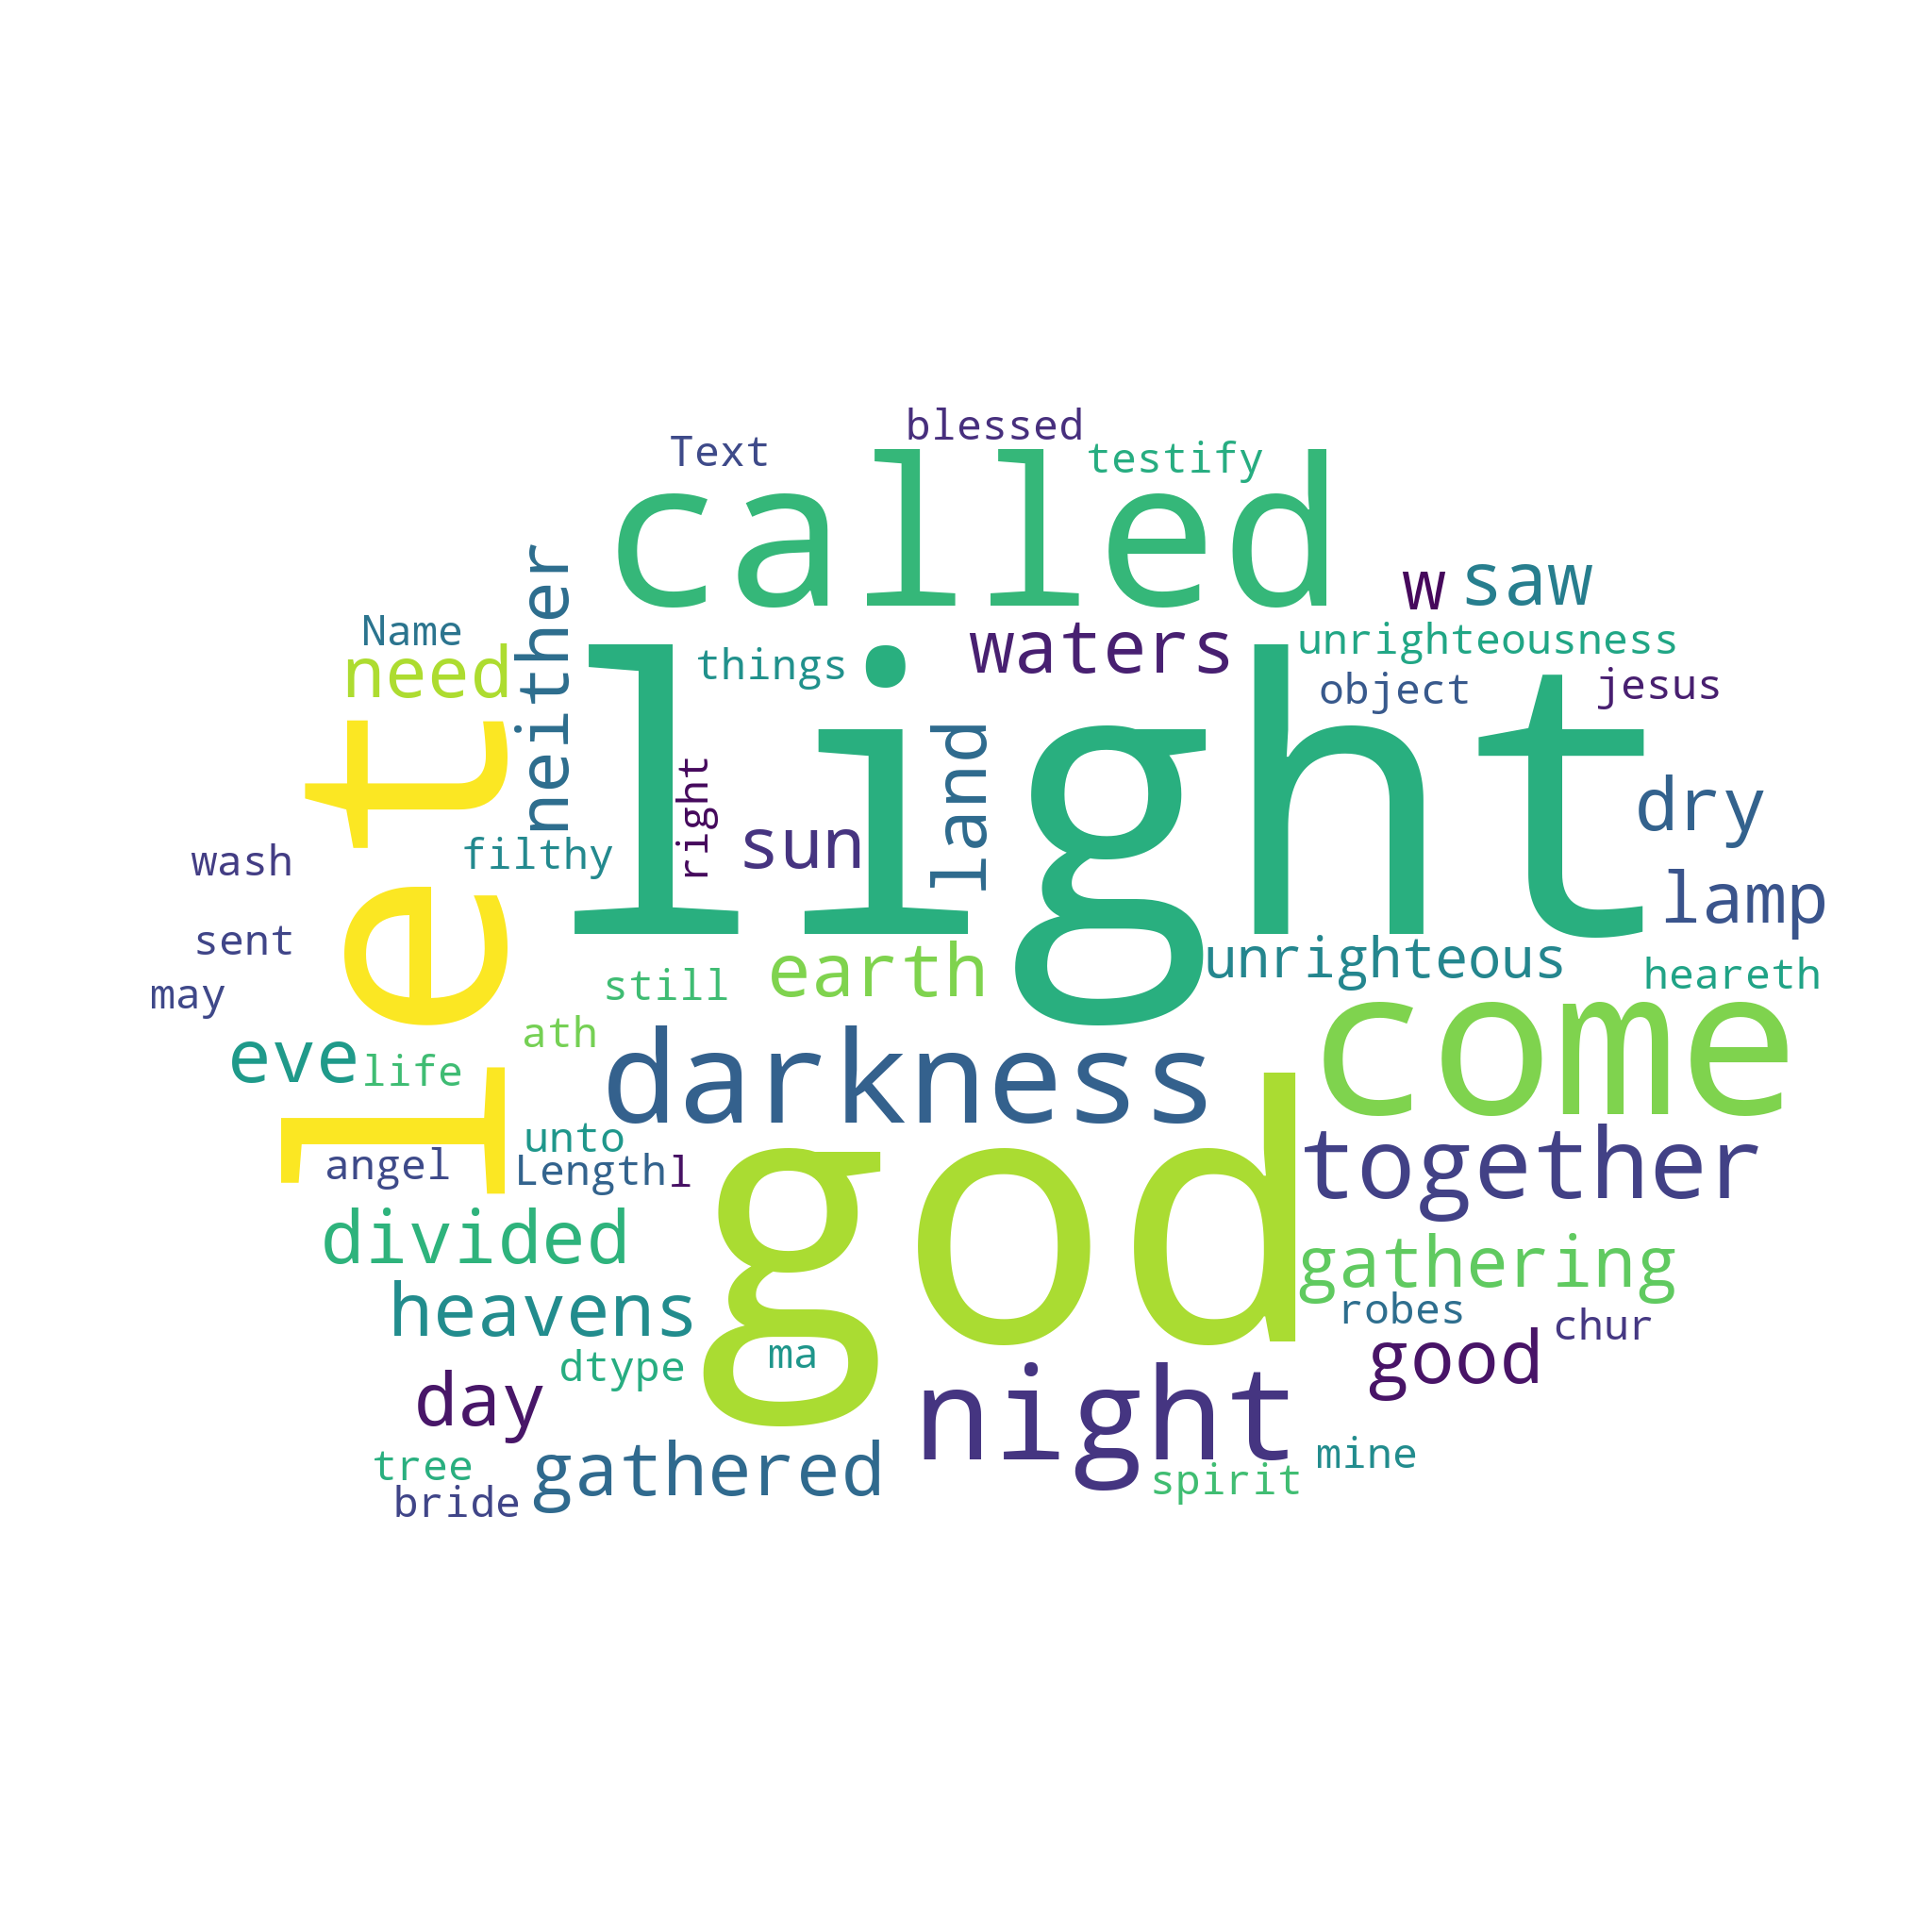

In [210]:
create_wordcloud(text_df[text_df['sentiment']==2].Text)

Word Cloud saved successfully


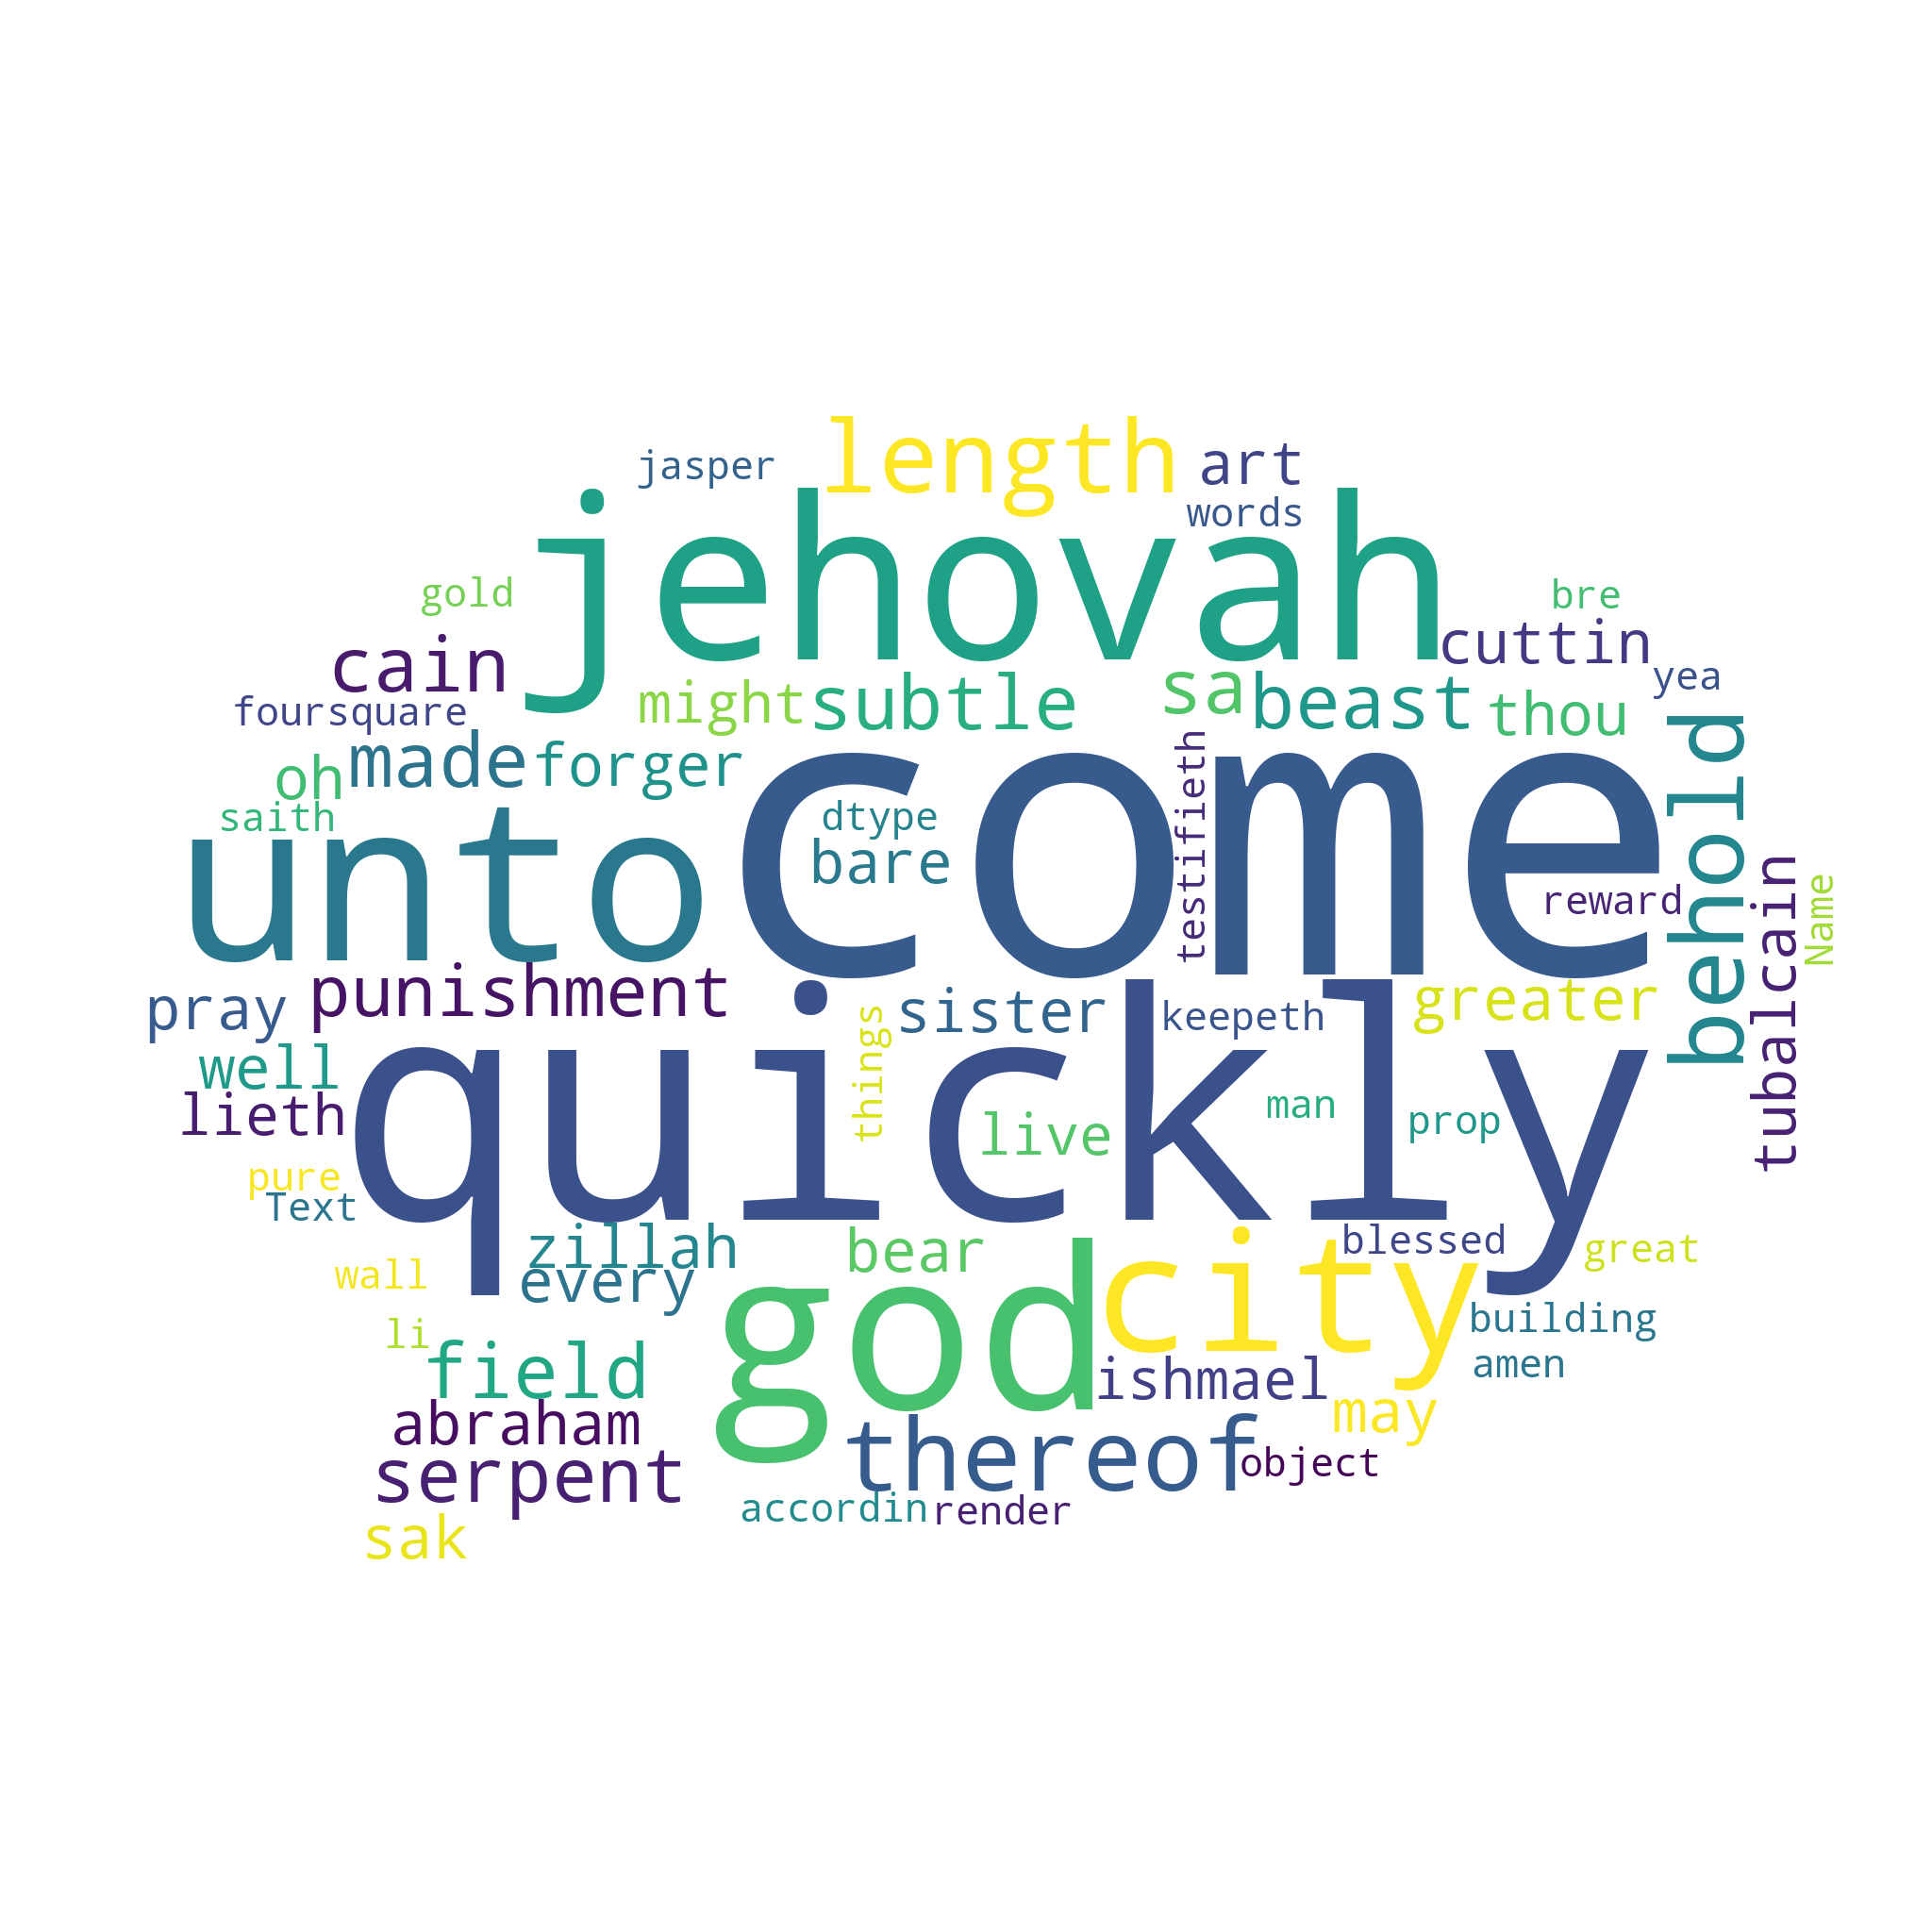

In [211]:
create_wordcloud(text_df[text_df['sentiment']==1].Text)

Word Cloud saved successfully


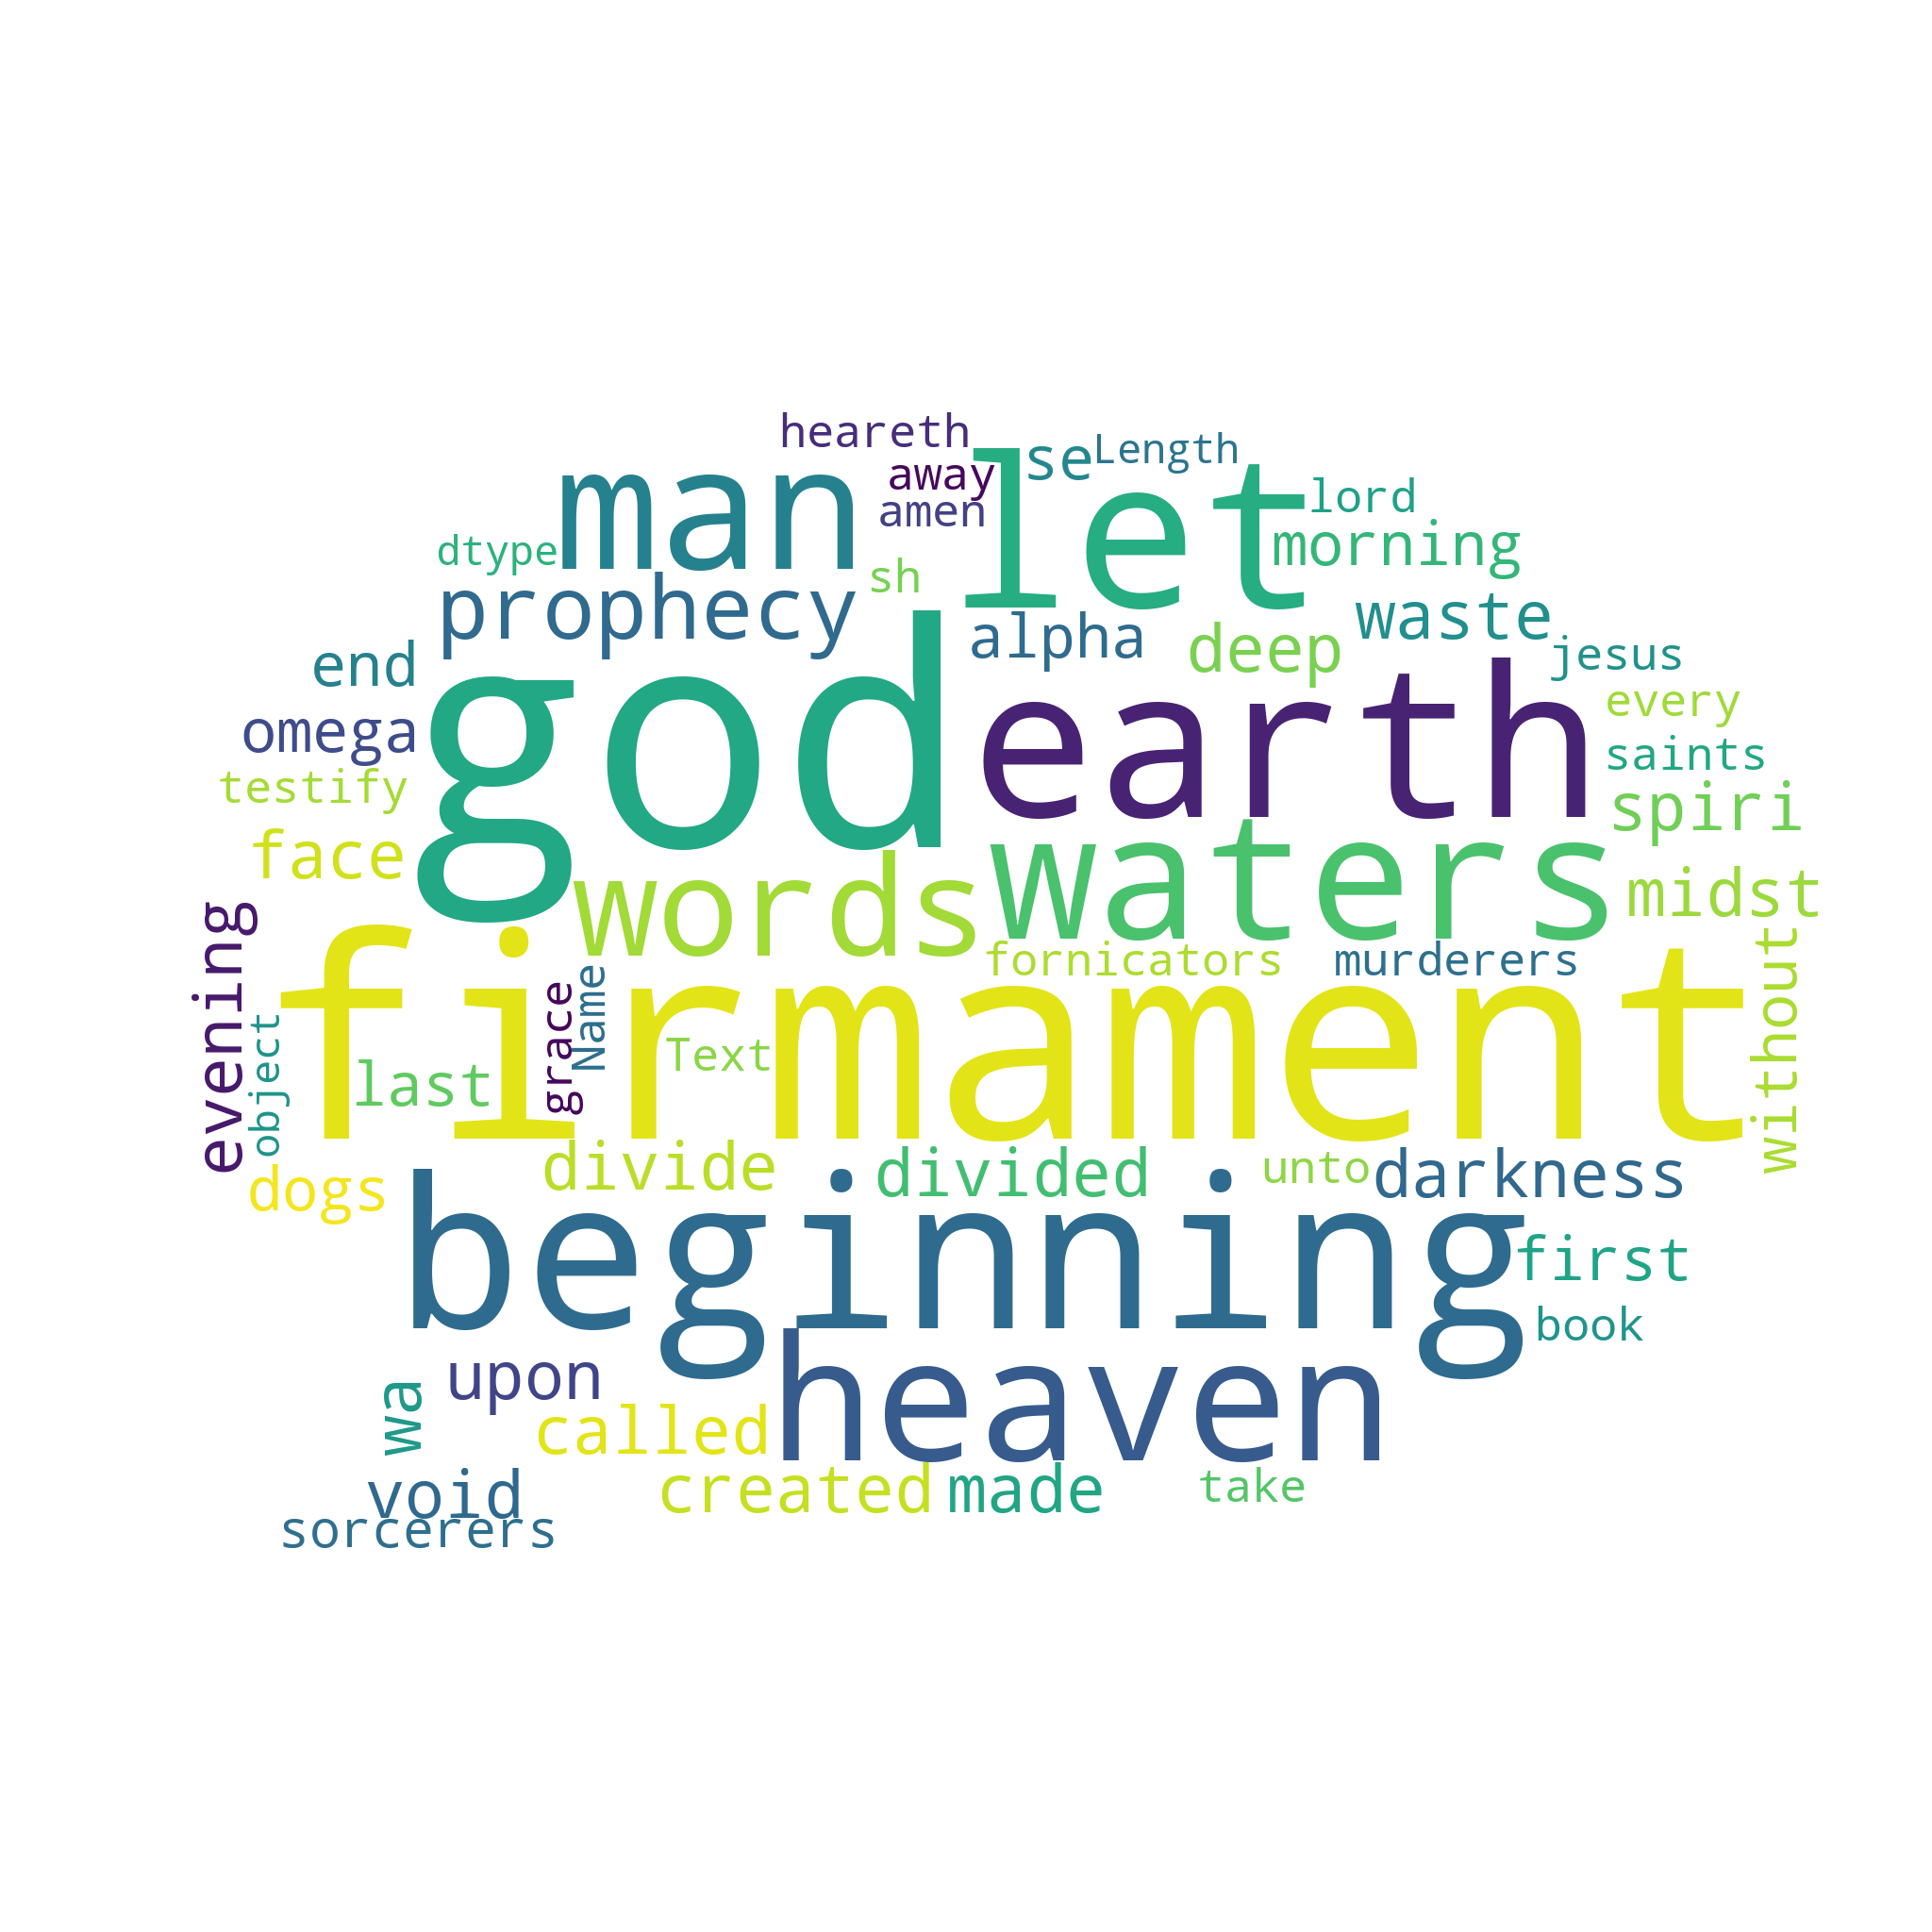

In [212]:
create_wordcloud(text_df[text_df['sentiment']==0].Text)

# Classification Model of Bible

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [214]:
text_df.sentiment =text_df.sentiment.astype('category')

In [215]:
x,y=text_df['Text'],text_df['sentiment']

In [216]:
x.shape,y.shape

((31102,), (31102,))

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [218]:
y_test

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


30329    0.0
23261    0.0
27826    2.0
11390    0.0
20094    2.0
        ... 
7282     0.0
12068    0.0
25284    2.0
687      2.0
22084    2.0
Name: sentiment, Length: 7776, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [219]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [220]:
x_train_dtm.shape,x_test_dtm.shape

((23326, 11519), (7776, 11519))

In [221]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [222]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [223]:
accuracy_score(y_test,b_predict)

0.8575102880658436

In [224]:
#The model can predict missing test part of the bible with %85 accuracy.

In [225]:
Turk_subj,Turk_polar,Eng_subj,Eng_polar,bible_polar,bible_subj

(0.008407658141700695,
 0.004988716956802063,
 0.3119537058218905,
 0.05250315458239923,
 0.055243421393073,
 0.23959822684165627)

In [226]:
#Bible has the highest avarage subjectivity and polarity.
#English quran has very less av. subjectivity and less av. polarity than Bible.
#Turkish quran has is the least av. subjecitivity and polarity.